#**ASSOCIATION - MARKET BASKET ANALYSIS**

This File contains information about Customers buying different grocery items at a Mall.

## 1. Install & import libraries 

In [1]:
# Need to install apyori first
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=ded77547b0b119662974de410459aea5cdc1374be04b28164742b9fc507d1ae1
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from apyori import apriori
from wordcloud import WordCloud

## 2. Open our dataset

In [14]:
# Import data local
from google.colab import files
uploaded = files.upload()

Saving Dataset_Asosiasi.csv to Dataset_Asosiasi (1).csv


In [15]:
#open our dataset 
grocery_item = pd.read_csv('Dataset_Asosiasi.csv', sep=",", header = None)

In [16]:
#see Row dan Column 
grocery_item.shape

(902, 20)

We have .... row, ... column 

In [17]:
#check sample in dataset
grocery_item.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
288,frozen vegetables,parmesan cheese,mineral water,eggplant,chocolate,frozen smoothie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,burgers,ham,tomatoes,spaghetti,milk,eggs,whole wheat rice,chocolate,french fries,frozen smoothie,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,frozen vegetables,ground beef,mineral water,milk,olive oil,pancakes,eggs,cooking oil,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,burgers,eggs,champagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,olive oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,grated cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,burgers,tomatoes,spaghetti,milk,barbecue sauce,frozen smoothie,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Visualisasi data

1. Wordcloud 

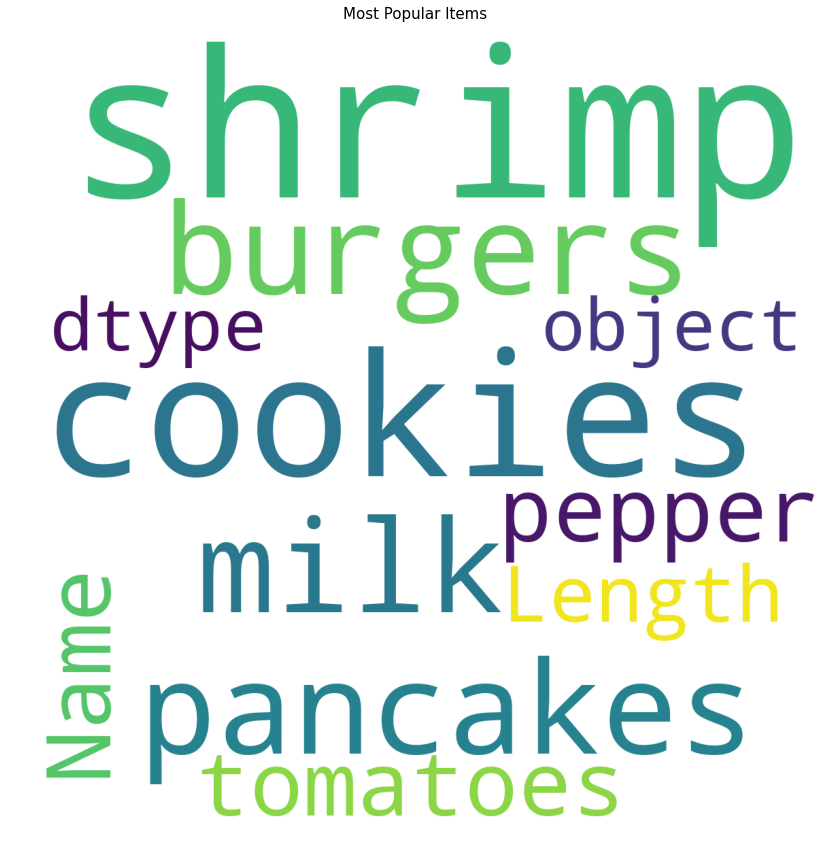

In [18]:
#Hasil Visualisasi Menggunakan wordcloud
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(grocery_item[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 15)
plt.show()

Wordcloud still subjective, check the barchart
2. Barchart

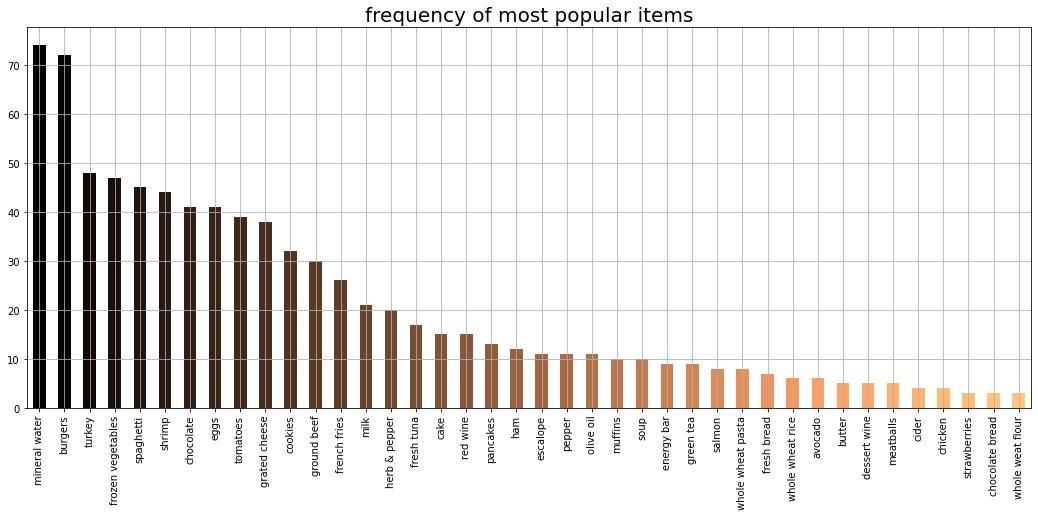

In [19]:
#Visualisasi dn 
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
grocery_item[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

## Preprocesing data 

In [ ]:
# Data preprocessing
transactions = []
for i in range(0, 7501):
  transactions.append([str(grocery_item.values[i,j]) for j in range(0, 20)])

In [ ]:
# conveting it into an numpy array
transactions = np.array(transactions)

In [ ]:
# checking the shape of the array
print(transactions.shape)

Use Transaction Encoder, the data dimension show 7501 - 121

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(transactions)
data = pd.DataFrame(data, columns = te.columns_)
# getting the shape of the data
data.shape

121?  to much column, we need to reduce it to 40 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 40

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]
# getting the shape of the data
data.shape

In [ ]:
# let's check the columns

data.columns

## Algoritma Apriori (Asociation Rules) 

In [ ]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least min 0.01 support:
apriori(data, min_support = 0.01, use_colnames = True)

set rules rules with  length = 2, dan support more than 0.01

In [ ]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
# getting th item sets with length = 2 and support more than 1%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

we have three rules, pick the higest rules 0.059 (mineral water & Spaghetti) if you are buying spaghetti, usually you will buy mineral water